# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.mlab as mlab
import math

df = pd.read_csv('data/human_body_temperature.csv')

## Is the distribution of body temperatures normal?

First, let's peak at the data. From the table below, it appears that df consists of thee columns: temperature, gender, and heart_rate

In [3]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73
5,99.2,M,83
6,98.0,M,71
7,98.8,M,78
8,98.4,F,84
9,98.6,F,86


For a quick visual analysis, we'll overlay a normal curve over the histogram of temperature data.

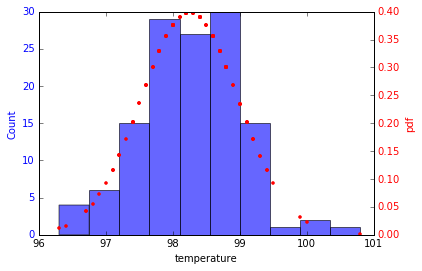

In [4]:
%matplotlib inline 
fig, ax1 = plt.subplots()
ax1.hist(df["temperature"], alpha = 0.6)
ax1.set_xlabel('temperature')
ax1.set_ylabel('Count', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

hmean = np.mean(df["temperature"])
hstd = np.std(df["temperature"])
h_n = (df["temperature"] - hmean) / hstd
pdf = stats.norm.pdf( h_n )

ax2 = ax1.twinx()
ax2.plot(df["temperature"], pdf, 'r.')
ax2.set_ylabel('pdf', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


We can use the stats package from scipy to run a normalcy test on the temeprature data. From the analysis below, the distribution is a normal distrubtion (the null hypothesis is that the temrpature data is nromally distributed).

In [5]:
from scipy import stats
k2, p = stats.normaltest(df["temperature"])
alpha = 0.05
print("p = {:g}".format(p))



p = 0.258748


In [6]:

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis cannot be rejected


We can also perform a more manual normalcy test. 
First, we computer the t-statistic of the sample minimum and maximum. If one has a 3s event, then a normal distribution will understate the maximum magnitude of deviations in the sample data.

In [7]:
df_min = min(df["temperature"])
df_max = max(df["temperature"])

#Studnt, n=130, p<0.05, 2-tail
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp([df_max, df_min], 98.6))



t-statistic = -0.022 pvalue = 0.9859


In [8]:
#Studnt, n=130, p<0.05%, Single tail
#equivalent to Excel TINV(2*0.05,999)
print stats.t.ppf(1-0.05, 130)

1.65665941271


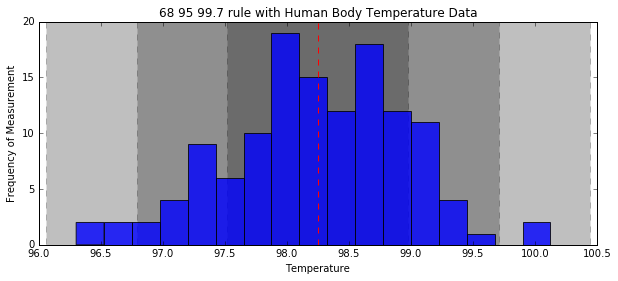

In [9]:
H, edges = np.histogram(df["temperature"], bins=50)


plt.figure(figsize=(10, 4))
plt.title("68 95 99.7 rule with Human Body Temperature Data")
plt.hist(df["temperature"], bins = 20, alpha = 0.8)
plt.plot([hmean, hmean], [0, 20], linestyle="--", color="r")
plt.fill_between([hmean - 3*hstd, hmean + 3*hstd],
                 [0, 0],
                 [20, 20], linestyle="--", color='k', alpha=0.25)
plt.fill_between([hmean - 2*hstd, hmean + 2*hstd],
                 [0, 0],
                 [20, 20], linestyle="--", color='k', alpha=0.25)
plt.fill_between([hmean - hstd, hmean + hstd],
                 [0, 0],
                 [20, 20], linestyle="--", color='k', alpha=0.25)
plt.xlim(96, 100.5)
plt.xlabel("Temperature"); plt.ylabel("Frequency of Measurement")
plt.show()

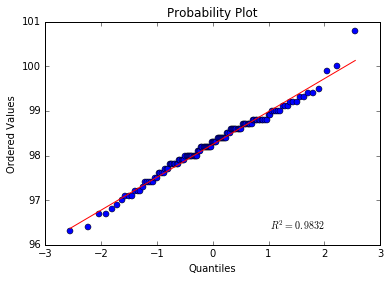

In [10]:
import pylab 

stats.probplot(df["temperature"], dist="norm", plot=pylab)
pylab.show()

## Is the sample size large? Are the observations independent?

The general rule is that a sample size is large if n>= 30. This set contains 130 obversations, so the sample size is large. 

"Two samples are independent if the sample values selected from one population are not related or somehow paired or matched with the sample values selected from the other population."

Since each observation is a separate person, the observations are independent.

## Is the true population mean really 98.6 degrees F?

### Bootstrap Hypothesis Test

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.0640566146952
0.0642681985786


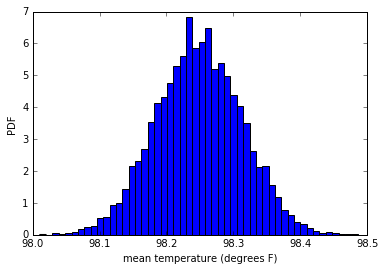

In [12]:
bs_replicates = draw_bs_reps(df["temperature"], np.mean, 10000)
# Compute and print SEM
sem = np.std(df["temperature"]) / np.sqrt(len(df))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature (degrees F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [13]:
np.percentile(bs_replicates, [ 2.5, 97.5])

array([ 98.12305769,  98.37307692])

The 95% confidence interval for this bootstrap test is (98.122, 98.374), which does not contain the theorized mean 98.6. 

In this situation, it is appropriate to use a one sample z test. We are comparing the mean agaisnt a hypothetical population mean and the sample size is above 30.

### One Sample Z Test
**Null Hypothesis** The true normal mean body temperature is 98.6 degree F.   
**Alternative Hypothesis** The true normal mean body temeprature is not 98.6 degree F.

In [38]:
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

z = (x - mu)/(std / math.sqrt(n))
print('Z stat:', z)



('Z stat:', -5.4548232923645195)


In [39]:
p = stats.t.sf(np.abs(z), n-1)*2 
print('P value:', p)

('P value:', 2.4106320415561276e-07)


Since p is less than our alpha of 0.05, we reject the null hypothesis. The true normal mean body temeprature is not 98.6 degree F.

## One Sample T Test -- An Alternative approach
For learning's sake, lets try a t test and compare the results with the z test.

In [42]:
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

t = (x - mu)/(std / math.sqrt(n))
print('T statistic:', t)

('T statistic:', -5.4548232923645195)


In [43]:
p = stats.t.sf(np.abs(t), n-1)*2 
print('P value:', p)

('P value:', 2.4106320415561276e-07)


The corresponding T-value from a T-chart is -1.979. Since our T Statistic is less than this, we can reject the null hypothesis in favor of the alternative hypothesis.

## Draw a small sample of size 10 from the data and repeat both frequentist tests.
Since n is less than 30, a t test is more appropriate here

### One Sample Z Test on n = 10

In [20]:
sample = df["temperature"].sample(10)

In [48]:
x = sample.mean()
mu = 98.6
std = sample.std()
n = len(sample)

z = (x - mu)/(std / math.sqrt(n))
print('Z stat:', z)

('Z stat:', -0.40824829046382394)


In [49]:
p = stats.t.sf(np.abs(z), n-1)*2 
print('P value:', p)

('P value:', 0.69263332423227808)


Since p is greater than our alpha of 0.05, we keep the null hypothesis. The true normal mean body temeprature is 98.6 degree F.

### One Sample T Test on n = 10

In [50]:
x = sample.mean()
mu = 98.6
std = sample.std()
n = len(df)

t = (x - mu)/(std / math.sqrt(n))
print('T statistic:', t)

('T statistic:', -1.4719601443878334)


In [51]:
p = stats.t.sf(np.abs(t), n-1)*2 
print('P value:', p)

('P value:', 0.14346710523722192)


Since p is greater than our alpha of 0.05, we keep the null hypothesis. The true normal mean body temeprature is 98.6 degree F.

## At what temperature should we consider someone's temperature to be "abnormal"?
First, let's compute the margin of error and the confidence interval.


In [27]:
margin = 1.96 * std
margin

2.0164199562591087

In [28]:
x_bar = np.mean(df["temperature"])
std = np.std(df["temperature"])
stats.norm.interval(0.95, loc=x_bar, scale=std)


(96.817755826748211, 99.680705711713287)

An abnormal body temeprature is one that is below 96.8 degrees F and above 99.68 degrees F.

From above, our bootstrap test showed a 95% confidence interval of (98.12076923,  98.37538462) degrees F. This shows that an abnormal temeprature would be below 98.1 degrees F and above 98.37 degree F.

In [29]:
x_bar = np.mean(df["temperature"])
std = np.std(df["temperature"])
sample_size = len(df)
s = scipy.stats.sem(df["temperature"])
mu = 98.6

alpha = 0.025 
Z_value = 1.96

x_bar + Z_value * std/np.sqrt(sample_size)

98.374781734033334

In [30]:
x_bar - Z_value * std/np.sqrt(sample_size)

98.123679804428164

The confidence interval on the z-test in (98.37, 98.123) degree F. Anything below or above these values is abnormal

## Is there a significant difference between males and females in normal temperature?

In [31]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [32]:
female = df.loc[df['gender'] == "F"]
male = df.loc[df['gender'] == "M"]


In [33]:
df2 = df.groupby(['gender']).mean()
df2

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [34]:
mu_female = df2.temperature[0]
mu_male = df2.temperature[1]

Since we are determining the significance of the difference on means, we will conduct a hypothesis test 

Null Hypothesis: There is not a significant difference between the mean body temeprature for females and the mean body temperature for males
Alternative Hypothesis: There is a significant difference between the mean body temperature for females and the mean body temeprature for males.



In [35]:
stat = mu_female - mu_male
se_female = scipy.stats.sem(female["temperature"])
se_male = scipy.stats.sem(male["temperature"])
MSE = (se_female + se_male) /2
s = np.sqrt(2* MSE / 65)
t = stat / s
t

5.5132820737144597

In [36]:
dof = (65 - 1) + (65-1)
dof

128

The probability that the null hypothesis is true is less than alpha = 0.05, so we reject the null hypothesis. There is a significant difference between female and male mean body temeprature.

## Conclusion
"The mean normal body temperature was held to be 37∘C or 98.6∘F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?"

To determine this, we ran a bootstrap hypothesis test and a one-sample z test. Both tests confirmed that the theorized 98.6 mean body temperature value fell outside the 95% confidence interval. Therefore, these data suggest that the real mean body temepratureis not 98.6 degree F.

Running the same tests comparing the difference between the mean boyd temeprature for males and females, we find that there is a significant difference between the two means.